In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv('/content/Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.shape

(10000, 14)

In [4]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
data.columns
data=data.drop(['RowNumber','CustomerId','Surname'],axis=1)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [8]:
data=pd.get_dummies(data,drop_first=True)
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [9]:
 data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


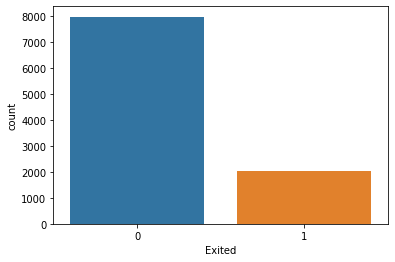

In [10]:
import seaborn as sns
sns.countplot(data['Exited'])

In [11]:
x=data.drop('Exited',axis=1)
y=data['Exited']

In [12]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [13]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [14]:
from imblearn.over_sampling import SMOTE
x_res,y_res=SMOTE().fit_resample(x,y)
y_res.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=.3,random_state=40)

In [16]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [17]:
x_train

array([[ 1.35713364,  0.51032979,  1.54117531, ..., -0.57030662,
         2.16378307,  1.18825203],
       [-1.02498171, -1.48814442,  1.54117531, ..., -0.57030662,
         2.16378307, -0.84157231],
       [ 1.36801088,  0.71017721, -0.30632591, ..., -0.57030662,
         2.16378307,  1.18825203],
       ...,
       [-0.56813767,  1.6094906 ,  0.80217482, ..., -0.57030662,
        -0.46215354,  1.18825203],
       [ 1.31362468,  0.81010092, -1.0453264 , ..., -0.57030662,
        -0.46215354,  1.18825203],
       [-0.73129626,  0.51032979,  0.06317433, ...,  1.75344273,
        -0.46215354, -0.84157231]])

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

knn_model=KNeighborsClassifier()
svm_model=svm.SVC()
NB_model=GaussianNB()
DT_model=DecisionTreeClassifier()
RF_model=RandomForestClassifier()
LG_model=LogisticRegression()

lstmodel=[knn_model,svm_model,NB_model,RF_model,DT_model,LG_model]

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
for i in lstmodel:
  print(i)
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print("*****************************************************")
  print(classification_report(y_test,y_pred))
  print("*****************************************************")


KNeighborsClassifier()
*****************************************************
              precision    recall  f1-score   support

           0       0.81      0.82      0.81      2328
           1       0.83      0.82      0.82      2450

    accuracy                           0.82      4778
   macro avg       0.82      0.82      0.82      4778
weighted avg       0.82      0.82      0.82      4778

*****************************************************
SVC()
*****************************************************
              precision    recall  f1-score   support

           0       0.82      0.85      0.83      2328
           1       0.85      0.82      0.83      2450

    accuracy                           0.83      4778
   macro avg       0.83      0.83      0.83      4778
weighted avg       0.83      0.83      0.83      4778

*****************************************************
GaussianNB()
*****************************************************
              precision    recall 

In [21]:
x_res=sc.fit_transform(x_res)
RF_model.fit(x_res,y_res)

RandomForestClassifier()

In [27]:
import joblib
joblib.dump(RF_model,'BANK_CHURN_PREDICT_MODEL')

['BANK_CHURN_PREDICT_MODEL']

In [28]:
model=joblib.load('BANK_CHURN_PREDICT_MODEL')

In [29]:
model

RandomForestClassifier()

In [30]:
model.predict([[619,42,2,0.00,1,1,1,101348.88,0,0,0]])

array([0])